In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import uproot
import re

In [10]:
def load_rq(rq_path):
    data = uproot.open(rq_path)
    events = data['event']
    event_ids = events['event_id'].array(library='np')
    aux_ch_areas = events['aux_ch_area_mV'].array(library='np')
    areas = events['ch_roi1_area_pe'].array(library='np')
    ch_ids = events['ch_id'].array(library='np')
    return aux_ch_areas, areas, ch_ids

In [11]:
rq_path = 'phase0_muon_water_220918T1559_rq.root'
aux_ch_areas, areas, ch_ids = load_rq(rq_path)

In [26]:
ch_ids[0]

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210,
       211, 212, 213, 214, 300, 301, 302, 303, 304, 305, 306, 307, 308,
       309, 310, 311, 312, 313, 314, 315], dtype=uint16)

In [37]:
ch_names = []
for i in range(30):
    ch_names.append('bt_p'+str(i+1))
for i in range(16):
    i
    col = i//4 + 1
    row = i%4 + 1
    ch_names.append('b'+str(col)+'_p'+str(row))
ch_map = dict(zip(ch_ids[0], ch_names))
ch_map

{101: 'bt_p1',
 102: 'bt_p2',
 103: 'bt_p3',
 104: 'bt_p4',
 105: 'bt_p5',
 106: 'bt_p6',
 107: 'bt_p7',
 108: 'bt_p8',
 109: 'bt_p9',
 110: 'bt_p10',
 111: 'bt_p11',
 112: 'bt_p12',
 113: 'bt_p13',
 114: 'bt_p14',
 115: 'bt_p15',
 200: 'bt_p16',
 201: 'bt_p17',
 202: 'bt_p18',
 203: 'bt_p19',
 204: 'bt_p20',
 205: 'bt_p21',
 206: 'bt_p22',
 207: 'bt_p23',
 208: 'bt_p24',
 209: 'bt_p25',
 210: 'bt_p26',
 211: 'bt_p27',
 212: 'bt_p28',
 213: 'bt_p29',
 214: 'bt_p30',
 300: 'b1_p1',
 301: 'b1_p2',
 302: 'b1_p3',
 303: 'b1_p4',
 304: 'b2_p1',
 305: 'b2_p2',
 306: 'b2_p3',
 307: 'b2_p4',
 308: 'b3_p1',
 309: 'b3_p2',
 310: 'b3_p3',
 311: 'b3_p4',
 312: 'b4_p1',
 313: 'b4_p2',
 314: 'b4_p3',
 315: 'b4_p4'}

In [15]:
areas[0]

array([ 2.2322197e+00,  3.2272141e+00,  2.1420624e+00,  2.0778484e+00,
        5.6972799e+00,  7.8570323e+00,  2.1583066e+00,  2.8644660e+00,
        2.6575282e+00,  3.0644827e+00,  2.7782500e+00,  3.7844369e+00,
        7.5806837e+00,  7.9960208e+00,  1.8454517e+01,  1.7987478e+01,
        7.4302139e+00,  5.2290444e+00,  4.9154997e+00,  9.4861546e+00,
        5.8004193e+00,  3.4826214e+00,  4.4686599e+00,  8.1068783e+00,
        6.9218912e+00,  1.4700082e+01,  9.7071352e+00,  1.6901295e+01,
        9.5949135e+00,  1.6605843e+01,  4.4405751e+00, -2.7755576e-17,
        1.0196363e+01,  2.2124393e+00,  2.3646593e+00,  1.6370931e+00,
        7.2493305e+00,  5.4004431e+00,  1.3651459e+00,  2.4809006e-01,
        2.5183132e+00,  3.2768843e+00,  2.6643121e+00,  1.0001834e+01,
        2.0430336e+01,  5.8374802e+01], dtype=float32)

In [16]:
aux_ch_areas[0]

array([41.018127, 32.71684 ], dtype=float32)

array([[ 253],
       [ 315],
       [ 502],
       [ 689],
       [ 711],
       [ 922],
       [1106],
       [1286],
       [1688],
       [1696],
       [1794],
       [2096],
       [2235],
       [2367],
       [2426],
       [2515],
       [2706],
       [3169],
       [3320],
       [3333],
       [3482],
       [3559],
       [3698],
       [3827],
       [3877],
       [3895],
       [4145],
       [4253],
       [4312],
       [4414],
       [4495],
       [4569],
       [4650],
       [4735],
       [4753],
       [4902],
       [5032],
       [5097],
       [5124],
       [5317],
       [5438],
       [5484],
       [5559],
       [5578],
       [5829],
       [6146],
       [6175],
       [6189],
       [6309],
       [6545],
       [6570],
       [6625],
       [6847],
       [7238],
       [7399],
       [7414],
       [7461],
       [7586],
       [7923],
       [7969],
       [8278],
       [8426],
       [8478],
       [8547],
       [8717],
       [8766],
       [88

In [20]:
ch_ids.shape

(9654, 46)

In [21]:
areas.shape

(9654, 46)

In [222]:
y = [381. ,  381. ,  381. ,  381. ,  190.5,  190.5,  190.5,  190.5, 190.5,  190.5,  190.5,    0. ,    0. ,    0. ,    0. ,    0. , 0. ,    0. ,    0. , -190.5, -190.5, -190.5, -190.5, -190.5, -190.5, -190.5, -381. , -381. , -381. , -381.]
x = [-171.45,  -57.15,   57.15,  171.45, -342.9 , -228.6 , -114.3 , 0.  ,  114.3 ,  228.6 ,  342.9 , -400.05, -285.75, -171.45,-57.15,   57.15,  171.45,  285.75,  400.05, -342.9 , -228.6, -114.3 ,    0.  ,  114.3 ,  228.6 ,  342.9 , -171.45,  -57.15, 57.15,  171.45]
y = [-val for val in y]
side_x = [1674.33, 1674.33, 1674.33, 1674.33, \
          -837.16, -837.16, -837.16, -837.16, \
          837.16, 837.16, 837.16, 837.16, \
          0, 0, 0, 0, ]
side_x = [0, 0, 0, 0, \
          -1603.755, -1432.305, -873.505, -714.755, \
          1603.755, 1432.305, 873.505, 714.755, \
          0, 0, 0, 0]
side_y = [-1603.755, -1432.305, -873.505, -714.755, \
          0, 0, 0, 0, \
          0, 0, 0, 0, \
          1603.755, 1432.305, 873.505, 714.755]

#side_y = [val + 677.1 + 532.955 for val in side_z]

In [223]:
PMTs = {}
for i, name in enumerate(ch_names):
    if 'bt' in name:
        PMTs[name] = {}
        PMTs[name]['x'] = x[i]
        PMTs[name]['y'] = y[i]
    else:
        PMTs[name] = {}
        PMTs[name]['x'] = side_x[i-30]
        PMTs[name]['y'] = side_y[i-30]

In [224]:
PMTs = {}
PMTs['x'] = x + side_x
PMTs['y'] = y + side_y

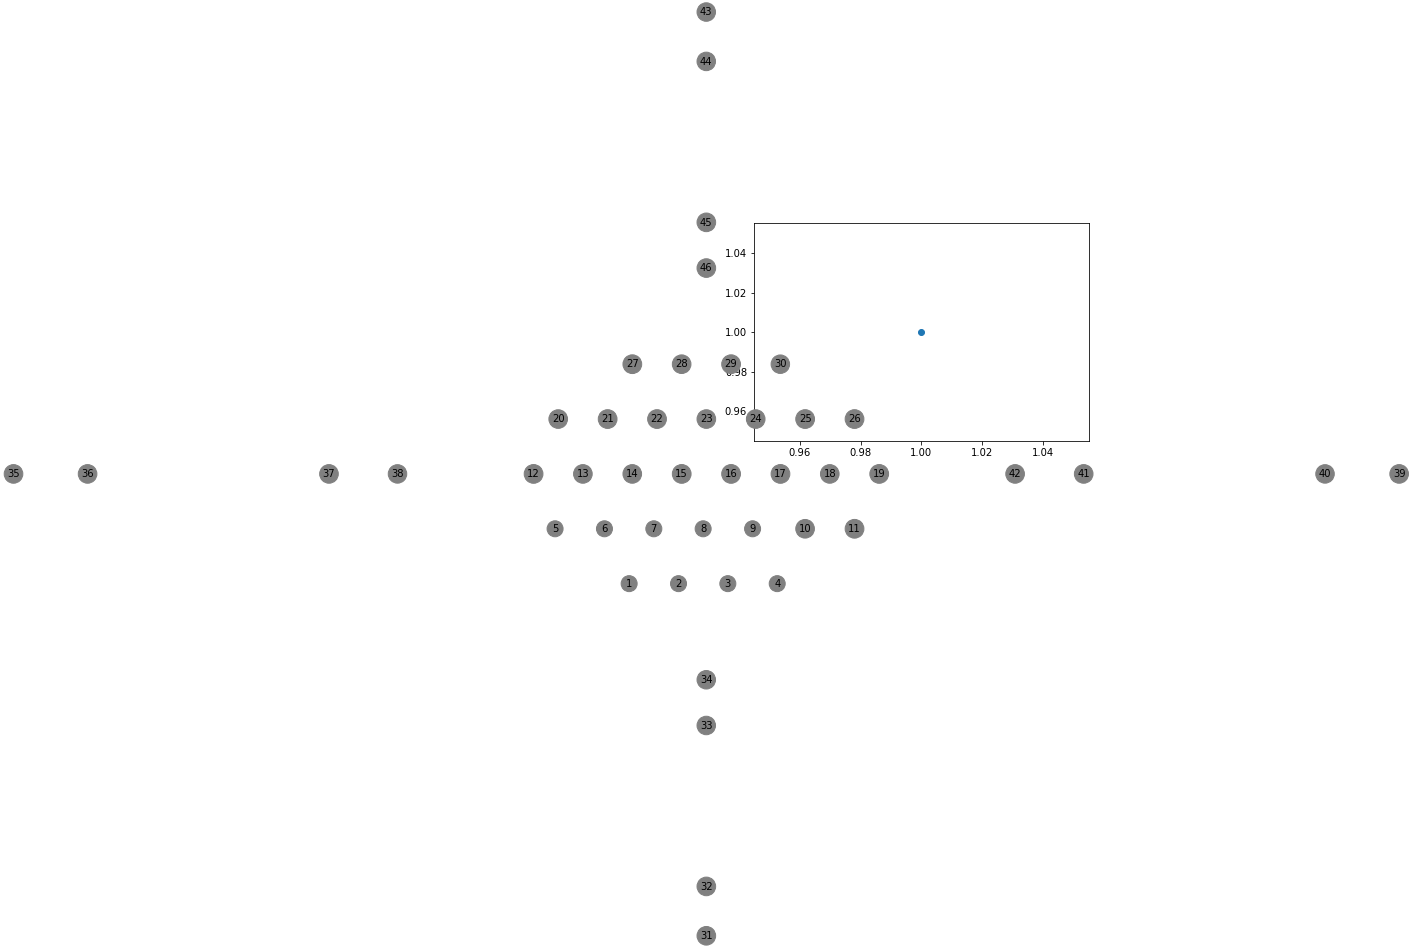

In [225]:
plt.plot(1, 1, 'o')
for i in range(46):
        plt.figtext(PMTs['x'][i]/1000,PMTs['y'][i]/1000,str(i+1), bbox={"boxstyle" : "circle", "color":"grey"})       
plt.show()

In [239]:
def plot_detector_event(PMTs, ch_areas, event_number):
    
    low = np.min(ch_areas[event_number])
    high = np.max(ch_areas[event_number])
    window = high - low
    labels = [low + window*x for x in np.linspace(0,1,6)]
    labels = [f'{i:.1f}' for i in labels]
    cmap = cm.get_cmap('jet')
    
    fig, ax = plt.subplots(figsize=(12, 9.4))
    
    colors = [cmap((area - low)/window) for area in ch_areas[event_number]]
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='jet'), ax=ax)
    cbar.ax.set_yticklabels(labels, fontsize=15)
    cbar.set_label('PMT charge [pe]', rotation=270, labelpad=25, fontsize=15)
    
    ax.scatter(PMTs['x'], PMTs['y'], c=colors, s=200)
    ax.set_xlim([-1800, 1800])
    ax.set_ylim([-1800, 1800])
    plt.axis('off')
#    ax.set_xlabel('x-position [mm]')
#    ax.set_ylabel('y-position [mmm]')
#    ax.legend()
    plt.show()

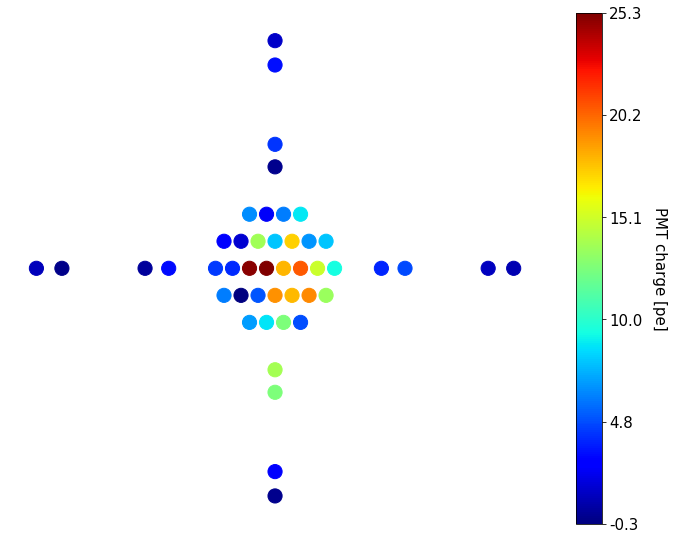

In [245]:
i = 1
plot_detector_event(PMTs, areas, args[i][0])

In [155]:
args = np.argwhere((aux_ch_areas[:, 0]/50>15)|(aux_ch_areas[:, 1]/50>15))

In [157]:
args[0][0]

253